# Playground to create 3 input linear model

Play around and see what we are doing and what the data looks like.

In [1]:
import numpy as np

n = 100
d = 3

# Generate numbers between -1.0 and 1.0, n rows and 3 columns
x = np.random.uniform(-1, 1, (n, d))

# Showing 20 of them
print(x[0:5])

[[-0.54039656  0.83994648 -0.28361931]
 [-0.7576891  -0.72689899  0.89727209]
 [-0.08941817  0.9848593  -0.98182611]
 [-0.57233785 -0.79902921 -0.80952026]
 [ 0.70026827  0.33451453 -0.83382532]]


In [2]:
# y = w * x + b
# y = (w_0 * x_0) + (w_1 * x_1) + (w_2 * x_2)

# Randomly assigning weights
weights_true = np.array([[3,-2, 1]]).T

print(weights_true)

[[ 3]
 [-2]
 [ 1]]


In [3]:
bias_true = np.array([0.2])
print(bias_true)

[0.2]


In [4]:
print(x.shape, weights_true.shape, bias_true.shape)

(100, 3) (3, 1) (1,)


In [5]:
# Matmult with data and wieghts, adding bias_true as well.
y_true = (x @ weights_true) + bias_true
print(y_true[:5])

[[-3.38470194]
 [ 0.27800278]
 [-3.01979921]
 [-0.72847541]
 [ 0.79795043]]


In [6]:
print (f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

x: (100, 3), weights: (3, 1), bias: (1,), y: (100, 1)


# Creating a method to generate the data (linear)

This will be used to create inputs for linear function.

In [7]:
import numpy as np
# f(x,y,z) = (w1, w2)
def generate_linear_three_input_two_output(number_of_rows, dimensions, weights_0, bias_0, weights_1, bias_1):

  n = number_of_rows
  d = dimensions

  # Generate numbers between -1.0 and 1.0, n rows and 3 columns
  x = np.random.uniform(-1, 1, (n, d))

  # Showing 20 of them
  # print(x[:10])

  # y = w * x + b
  # y = (w_0 * x_0) + (w_1 * x_1) + (w_2 * x_2)

  # Randomly assigning weights
  weights_true_0 = np.array([weights_0]).T

  # print(weights_true)

  bias_true_0 = np.array(bias_0)
  # print(bias_true)

  # print(x.shape, weights_true.shape, bias_true.shape)

  # Matmult with data and wieghts, adding bias_true as well.
  y_true_0 = (x @ weights_true_0) + bias_true_0
  # print(y_true[:10])

  print (f'x: {x.shape}, weights: {weights_true_0.shape}, bias: {bias_true_0.shape}, y: {y_true_0.shape}')

  # Randomly assigning weights
  weights_true_1 = np.array([weights_1]).T

  # print(weights_true)

  bias_true_1 = np.array(bias_1)
  # print(bias_true)

  # print(x.shape, weights_true.shape, bias_true.shape)

  # Matmult with data and wieghts, adding bias_true as well.
  y_true_1 = (x @ weights_true_1) + bias_true_1
  # print(y_true[:10])

  print (f'x: {x.shape}, weights: {weights_true_1.shape}, bias: {bias_true_1.shape}, y: {y_true_1.shape}')

  return { "input" : x, "weights_true_0" : weights_true_0, "bias_true_0" : bias_true_0, "y_true_0" : y_true_0, "weights_true_1" : weights_true_1, "bias_true_1" : bias_true_1, "y_true_1" : y_true_1}
  # f(x,y,z) = (w1, w2)

In [8]:
three_input_two_output_func = generate_linear_three_input_two_output(100, 3, [3, -2, 1], [.2], [2, -1, 3], [.4])
# print (three_input_two_output_func)

x: (100, 3), weights: (3, 1), bias: (1,), y: (100, 1)
x: (100, 3), weights: (3, 1), bias: (1,), y: (100, 1)


# Visualize (linear)

The 4th dimension is represented using the heatmap. This was recommended by several online tutorials. Here is where I got the code:

https://stackoverflow.com/questions/14995610/how-to-make-a-4d-plot-with-matplotlib-using-arbitrary-data

## Visualize function definition

In [9]:
def return_individual_input(data, index):
    temp = []
    for d in data:
      temp.append(d[index])
    
    return temp

def plot4d(input, y_true): 
  from mpl_toolkits.mplot3d import Axes3D
  import matplotlib.pyplot as plt
  import numpy as np

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  x = return_individual_input(input, 0)
  y = return_individual_input(input, 1)
  z = return_individual_input(input, 2)
  output = return_individual_input(y_true, 0)

  img = ax.scatter(x, y, z, c=output, cmap=plt.hot())
  fig.colorbar(img)
  plt.show()

## Visualize function 1

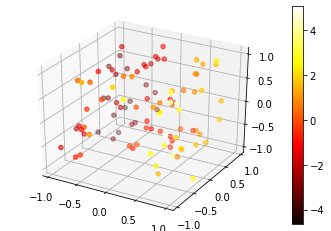

In [10]:
plot4d(three_input_two_output_func['input'], three_input_two_output_func['y_true_0'])

## Visualize function 2

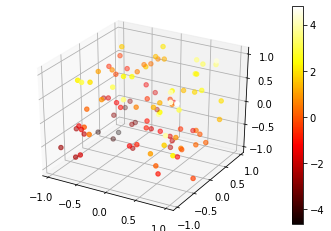

In [11]:
plot4d(three_input_two_output_func['input'], three_input_two_output_func['y_true_1'])

# Single Linear Layer

In [12]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient

# Testing it out
loss = MSE()
y_true_0 = three_input_two_output_func['y_true_0']
y_true_1 = three_input_two_output_func['y_true_1']
# print (y_true_0[:5])

print(f'Our initial loss is {loss(y_true_0, y_true_0)}')
print(f'Our initial loss is {loss(y_true_0, y_true_1)}')

Our initial loss is 0.0
Our initial loss is 2.195800468563415


In [13]:
class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [14]:
loss_0 = MSE()
loss_1 = MSE()

linear_0 = Linear(d)
linear_1 = Linear(d)

y_pred_0 = linear_0(three_input_two_output_func['input'])
y_pred_1 = linear_1(three_input_two_output_func['input'])

print(loss_0(y_pred_0, three_input_two_output_func['y_true_0']))
print(loss_1(y_pred_0, three_input_two_output_func['y_true_1']))

loss_gradient_0 = loss_0.backward()
loss_gradient_1 = loss_1.backward()

linear_0.backward(loss_gradient_0)
linear_1.backward(loss_gradient_1)

linear_0.update(0.1)
linear_1.update(0.1)

y_pred_0 = linear_0(three_input_two_output_func['input'])
y_pred_1 = linear_1(three_input_two_output_func['input'])

print(loss_0(y_pred_0, three_input_two_output_func['y_true_0']))
print(loss_1(y_pred_0, three_input_two_output_func['y_true_1']))

6.031134577648702
6.325156367288466
5.236608836559222
5.701726407412899


In [15]:
import sys
def linear_fit(three_input_two_output_func):
  
  loss_0 = MSE()
  loss_1 = MSE()
  linear_0 = Linear(d)
  linear_1 = Linear(d)

  num_epochs = 40 
  lr = 0.1

  for epoch in range(num_epochs):
    y_pred_0 = linear_0(three_input_two_output_func['input'])
    y_pred_1 = linear_1(three_input_two_output_func['input'])
    
    loss_val_0 = loss_0(y_pred_0, three_input_two_output_func['y_true_0'])
    loss_val_1 = loss_1(y_pred_1, three_input_two_output_func['y_true_1'])
    
    if epoch % 5 == 0:
      print(f'Epoch {epoch}, loss_0 {loss_val_0}, loss_1 {loss_val_1}')
      # print(f'Epoch {epoch}, loss {loss_val_1}')
      # plot4d(three_input_two_output_func['input'], y_pred_0_1)
    
    loss_gradient_0 = loss_0.backward()
    loss_gradient_1 = loss_1.backward()

    linear_0.backward(loss_gradient_0)
    linear_1.backward(loss_gradient_1)

    linear_0.update(lr)
    linear_1.update(lr)

linear_fit(three_input_two_output_func)

Epoch 0, loss_0 5.2748610814826975, loss_1 6.0902808959343755
Epoch 5, loss_0 2.5772178432639974, loss_1 3.0544046038568546
Epoch 10, loss_0 1.2622735942226966, loss_1 1.5541820228561412
Epoch 15, loss_0 0.6198686221623834, loss_1 0.7964509282455394
Epoch 20, loss_0 0.3052857771657425, loss_1 0.41046464956008544
Epoch 25, loss_0 0.150835319223461, loss_1 0.21268731939288987
Epoch 30, loss_0 0.07478648836758468, loss_1 0.11079756515342339
Epoch 35, loss_0 0.03722226510384338, loss_1 0.058024704828552494


# Creating a method to generate the data (non-linear)

In [16]:
import numpy as np
def generate_non_linear_three_input_two_output(number_of_rows, dimensions, weights_0, bias_0, weights_1, bias_1):

  n = number_of_rows
  d = dimensions

  # Generate numbers between -1.0 and 1.0, n rows and 3 columns
  x = np.random.uniform(-1, 1, (n, d))

  # Showing 20 of them
  # print(x[:10])

  # y = w * x + b
  # y = (w_0 * x_0) + (w_1 * x_1) + (w_2 * x_2)

  # Randomly assigning weights
  weights_true_0 = np.array([weights_0]).T

  # print(weights_true)

  bias_true_0 = np.array(bias_0)
  # print(bias_true)

  # print(x.shape, weights_true.shape, bias_true.shape)

  # Matmult with data and wieghts, adding bias_true as well.
  y_true_0 = ((x ** 2) @ weights_true_0) + (x @ weights_true_0) + bias_true_0
  # print(y_true[:10])

  print (f'x: {x.shape}, weights: {weights_true_0.shape}, bias: {bias_true_0.shape}, y: {y_true_0.shape}')

  # Randomly assigning weights
  weights_true_1 = np.array([weights_1]).T

  # print(weights_true)

  bias_true_1 = np.array(bias_1)
  # print(bias_true)

  # print(x.shape, weights_true.shape, bias_true.shape)

  # Matmult with data and wieghts, adding bias_true as well.
  y_true_1 = ((x ** 2) @ weights_true_1) + (x @ weights_true_1) + bias_true_1
  # print(y_true[:10])

  print (f'x: {x.shape}, weights: {weights_true_1.shape}, bias: {bias_true_1.shape}, y: {y_true_1.shape}')

  # return { "input" : x, "weights_true_0" : weights_true_0, "bias_true_0" : bias_true_0, "y_true_0" : y_true_0, "weights_true_1" : weights_true_1, "bias_true_1" : bias_true_1, "y_true_1" : y_true_1}
  return { "input" : x, "y_true_0" : y_true_0, "y_true_1" : y_true_1}

In [17]:
three_input_two_output_func = generate_non_linear_three_input_two_output(200, 3, [3, -2, 1], [.2], [2, -1, 3], [.4])
# print (three_input_two_output_func)

x: (200, 3), weights: (3, 1), bias: (1,), y: (200, 1)
x: (200, 3), weights: (3, 1), bias: (1,), y: (200, 1)


# Visualize (non-linear)

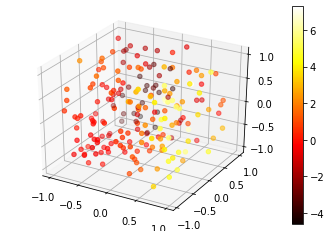

In [18]:
plot4d(three_input_two_output_func['input'], three_input_two_output_func['y_true_0'])

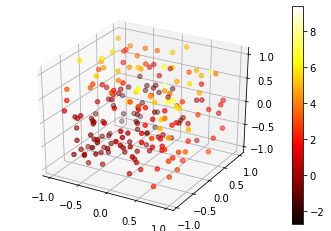

In [19]:
plot4d(three_input_two_output_func['input'], three_input_two_output_func['y_true_1'])

Definitely is non-linear compared to before, look at heatmap range. 

In [20]:
linear_fit(three_input_two_output_func)

Epoch 0, loss_0 8.123832010737233, loss_1 10.723585518869925
Epoch 5, loss_0 4.364946780005098, loss_1 4.796001344756482
Epoch 10, loss_0 2.674063628010033, loss_1 2.859246183718596
Epoch 15, loss_0 1.8725510060173187, loss_1 2.025729044181045
Epoch 20, loss_0 1.487301172855059, loss_1 1.635178862031458
Epoch 25, loss_0 1.3011762796879038, loss_1 1.4481004170766345
Epoch 30, loss_0 1.2109398947705825, loss_1 1.3578675472537238
Epoch 35, loss_0 1.167039552594282, loss_1 1.314181716117997


Linear fit isn't working as well to reduce loss.

# Non-Linear layer

In [21]:
class Relu:
  def __call__(self, input_):
      self.input_ = input_
      self.output = np.clip(self.input_, 0, None)
      return self.output

  def backward(self, output_gradient):
    # import pdb; pdb.set_trace()  # By the way, this is how you can debug
    self.input_gradient = (self.input_ > 0) * output_gradient
    return self.input_gradient

In [22]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden, 1)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2
  
  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

In [23]:
import sys
def non_linear_fit(three_input_two_output_func):
  loss_0 = MSE()
  loss_1 = MSE()
  model_0 = Model(d, 10)
  model_1 = Model(d, 10)

  num_epochs = 40 
  lr = 0.1

  for epoch in range(num_epochs):
    y_pred_0 = model_0(three_input_two_output_func['input'])
    y_pred_1 = model_1(three_input_two_output_func['input'])
    
    loss_val_0 = loss_0(y_pred_0, three_input_two_output_func['y_true_0'])
    loss_val_1 = loss_1(y_pred_1, three_input_two_output_func['y_true_1'])
    
    if epoch % 5 == 0:
      print(f'Epoch {epoch}, loss_0 {loss_val_0}, loss_1 {loss_val_1}')
      # print(f'Epoch {epoch}, loss {loss_val_1}')
      # plot4d(three_input_two_output_func['input'], y_pred_0_1)
    
    loss_gradient_0 = loss_0.backward()
    loss_gradient_1 = loss_1.backward()

    model_0.backward(loss_gradient_0)
    model_1.backward(loss_gradient_1)

    model_0.update(lr)
    model_1.update(lr)


non_linear_fit(three_input_two_output_func)


Epoch 0, loss_0 8.08195549238956, loss_1 7.71323411935588
Epoch 5, loss_0 2.5228039294779405, loss_1 2.2729479260512706
Epoch 10, loss_0 1.1145894852807197, loss_1 0.9976506355315371
Epoch 15, loss_0 0.8189940240024894, loss_1 0.6941351702385217
Epoch 20, loss_0 0.6680476572400634, loss_1 0.49024327752633384
Epoch 25, loss_0 0.5467344369163003, loss_1 0.351465249215927
Epoch 30, loss_0 0.4463003093629054, loss_1 0.25884654175579
Epoch 35, loss_0 0.3662377684897419, loss_1 0.1981960628298659
